# Wine dataset - FIC0024

In [9]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.preprocessing import MinMaxScaler

### Přehled dat

Na první pohled data set obsahuje výsledky chemické analízy vína

### Dataset v číslech

Dataset obsahuje celkem 178 záznamů a z 13 atributů, nad kterými lze provádět analyza.

### Popis argumentů
- Alcohol - obsah alkoholu v procentech
- Malic acid - obsah kyseliny jablečné (svěží a ostrá chuť)
- Ash - obsah popela
- Alcalinity of ash - zásaditost popela
- Magnesium - obsah hořčíku
- Total phenols - celkový obsah fenolů (chuť a barva)
- Flavanoids - obsah flavonoidů (hořkost)
- Nonflavanoid phenols - obsah ne-flavonoidních fenolů (barva a chuť)
- Proanthocyanins - zodpovědné za síravost vína
- Color intensity - intenzita barvy
- Hue - odstín vína
- OD280/OD315 of diluted wines - optická hustota při 280/315 nm
- Proline - obsah prolinu (chuť)

In [10]:
df_full = pd.read_csv('wine-clustering.csv', sep=',')
df_full

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Integrita dat

Když se podíváme, tak dataset neobsahuje žádné chybějící hodnoty, takže se nemusíme starat o nějaké dropování nebo doplňování hodnot.

In [11]:
df_full.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Při pohledu na statistiku lze pozorovat následující charakteristiky:

- Dataset obsahuje 178 pozorování a všechny sloupce mají plný počet hodnot (bez NaN).

- Rozpětí hodnot se u jednotlivých atributů liší — například:

    - Alcohol má hodnoty v rozmezí 11,03–14,83 %, což ukazuje přirozenou variabilitu mezi druhy vín.

    - Proline vykazuje velké rozmezí (278–1680 mg/l), což může naznačovat rozdíly v odrůdách hroznů nebo výrobních postupech.

    - Většina proměnných má malý směrodatný rozptyl, což znamená, že data jsou poměrně homogenní.

Medián je u většiny proměnných blízko průměru → rozložení hodnot je přibližně symetrické, bez výrazných odlehlých hodnot.

In [13]:
df_full.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [14]:
df_full['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [15]:
df_full['Proline'].describe()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64

## Analýza rozložení atributu Alcohol

Na histogramu vlevo je znázorněno rozložení hodnot obsahu alkoholu ve vzorcích vína. Rozsah se pohybuje přibližně od 11,0 % do 14,8 %, přičemž nejvíce vzorků se soustředí mezi 12,5 % a 13,5 %.

Rozložení má přibližně symetrický tvar, což naznačuje, že hodnoty nejsou výrazně zkreslené (nejsou outliery ani extrémní odchylky).

Histogram svým tvarem připomíná Gaussovu křivku, avšak střední část je mírně rozšířená a ukazuje, že většina vín má obsah alkoholu přibližně kolem 13,75 %.

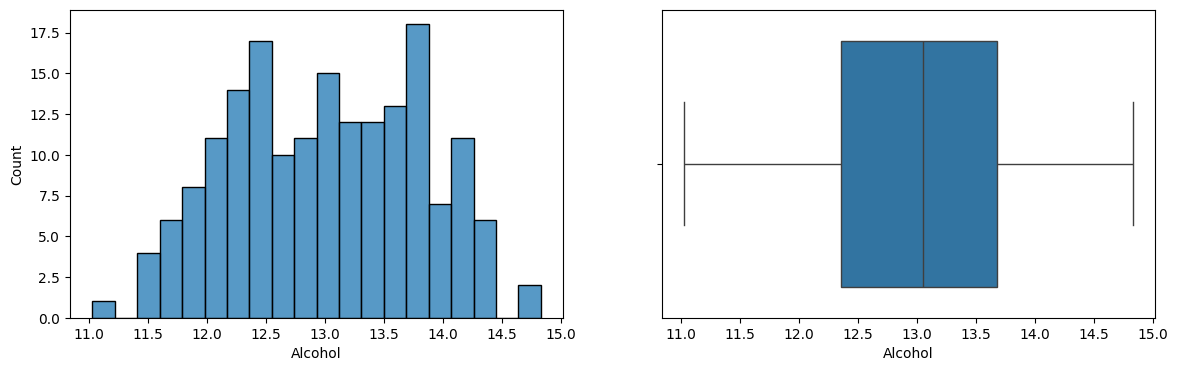

In [16]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Alcohol"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Alcohol"])
plt.show()

Pro jistotu se podíváme také na další sloupec, tentokrát na množství hořčíku (Magnesium) ve víně.
Z histogramu je patrné, že většina hodnot se pohybuje v rozmezí 80–120 mg/l, přičemž nejčastější výskyt je kolem 85 mg/l.

Na boxplotu lze pozorovat několik odlehlých hodnot (outlierů), které leží mimo hlavní rozložení dat – konkrétně na vyšších hodnotách okolo 140 až 160 mg/l.
Při dalších analýzách tedy bude vhodné s těmito odlehlými hodnotami počítat, případně zvážit jejich vyloučení nebo úpravu podle kontextu dat.

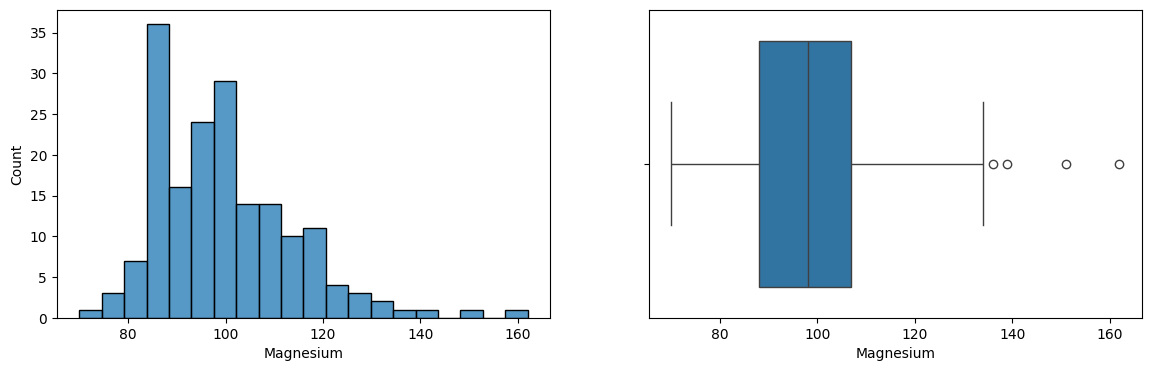

In [17]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Magnesium"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Magnesium"])
plt.show()


Jelikož se u některých proměnných objevily odlehlé hodnoty (outliery), rozhodl jsem se provést kontrolu napříč všemi sloupci, abych zjistil, kde přesně se tyto hodnoty vyskytují.

Na níže uvedených grafech je vidět, že odlehlé hodnoty se objevují u následujících atributů:

- Malic_Acid
- Ash
- Ash_Alcanity
- Magnesium
- Proanthocyanins
- Color_Intensity
- Hue

Z toho vyplývá, že tyto proměnné mohou vyžadovat další pozornost při analýze — například při normalizaci, standardizaci nebo při rozhodování, zda outliery ponechat či odstranit. Zatím zde zkusím outliery nechat a když tak pokud budou v clusteringu dělat nepořádek.

13


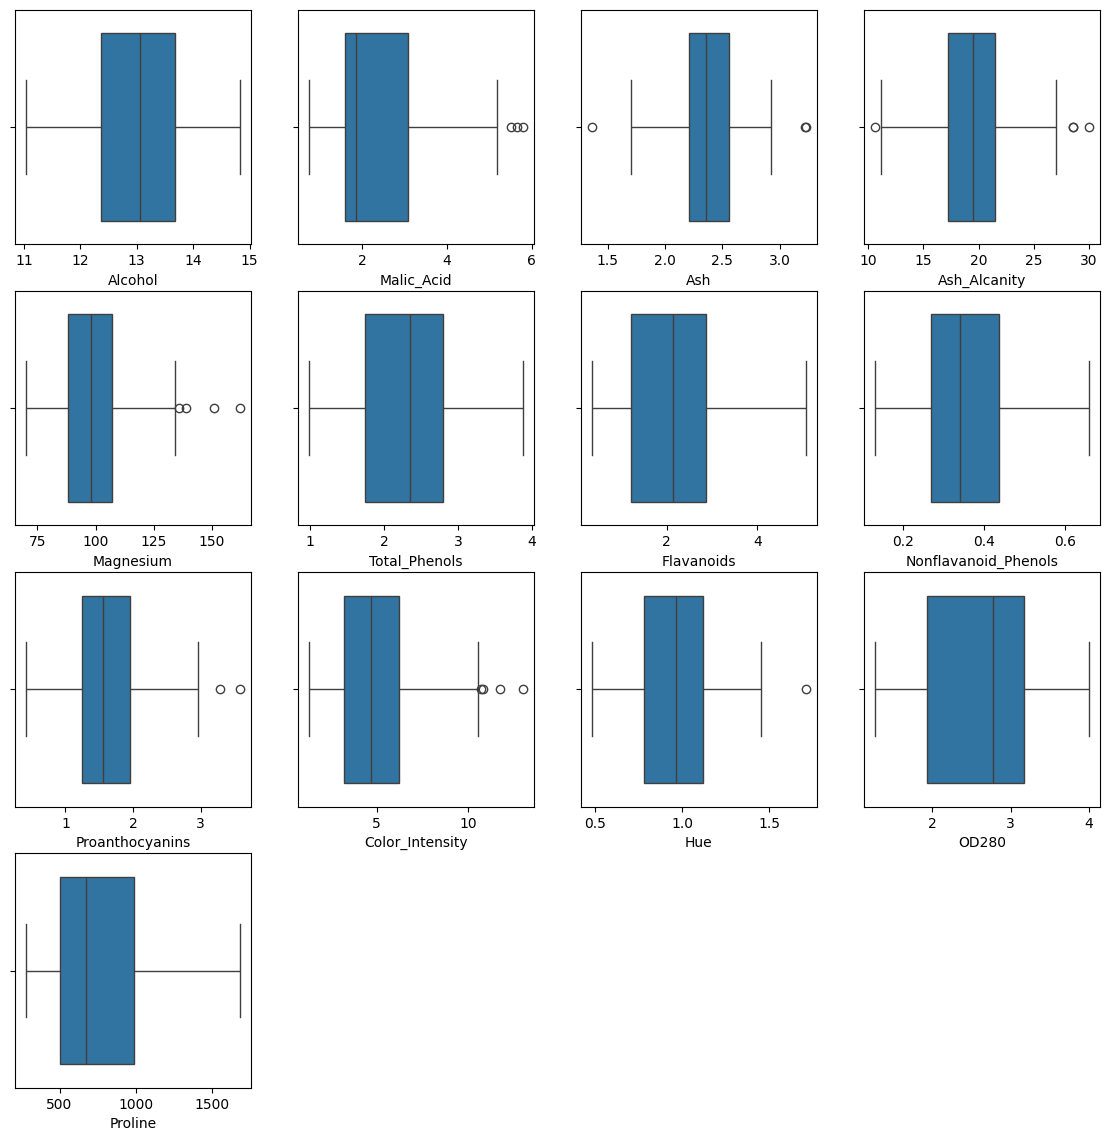

In [18]:
cols = df_full.columns

print(len(cols)) # 13 4x4

plt.figure(figsize=(14, 14))

i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_full[col])
plt.show()


### Kolerační matice

Nyní se pojďmě podívat na kolerační matici, abychom zjístil, jak jsou na sobě jednotlivé sloupce atributy závislé.

Z grafu je patrné, že některé proměnné spolu velmi silně korelují, zatímco jiné vykazují jen slabou nebo dokonce zápornou závislost.

Nejsilnější **pozitivní korelace** (tj. hodnoty blízké 1) jsou mezi:
- **Flavanoids** a **Total_Phenols** (r ≈ 0.86) – což naznačuje, že vína s vyšším obsahem flavonoidů mají také více celkových fenolů
- **OD280** a **Flavanoids** / **Total_Phenols** (r ≈ 0.79 a 0.70) – zde se potvrzuje jejich úzký vztah k chemickému složení vína
- **Alcohol** a **Proline** (r ≈ 0.64) – vína s vyšším obsahem alkoholu obvykle obsahují i více prolinu

Naopak **negativní korelace** (hodnoty blízké -1) se objevují například mezi:
- **Malic_Acid** a **Flavanoids** (r ≈ -0.41)
- **Ash_Alcanity** a **OD280** / **Flavanoids** (r ≈ -0.45 až -0.54)

Což znamená, že při růstu jednoho ukazatele má druhý tendenci klesat.

Celkově lze říci, že mezi většinou proměnných panuje střední až silná závislost, což může být užitečné při budoucí tvorbě modelů.

<Axes: >

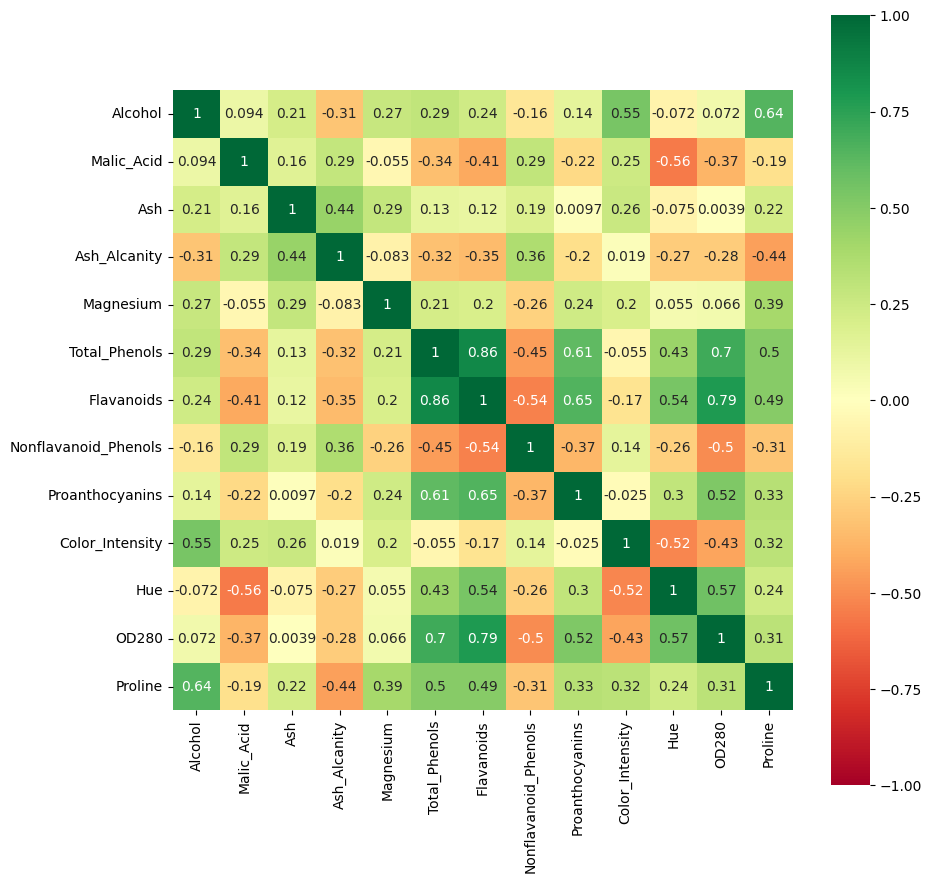

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_full.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

### Clustering

Teď se podíváme na clustering, tedy rozdělení dat do skupin podle podobnosti. Očekávám, že z datasetu půjde rozdělit vína podle typu – například na bílá, červená nebo růžová.

Všechna data máme kompletní, takže není potřeba nic doplňovat ani upravovat. Před samotným rozdělováním je ale potřeba data převést na stejnou škálu, aby měly všechny sloupce podobný význam pro výpočet.

Nejdříve se proto podíváme na histogramy všech atributů. Z nich je vidět, že skoro všechny hodnoty půjdou dobře přeškálovat pomocí MinMax Scaleru. 

U sloupců Malic_Acid a Magnesium by se dal použít i PowerTransformer, ale pro začátek zvolím jednodušší možnost – použiji jen MinMax Scaler.

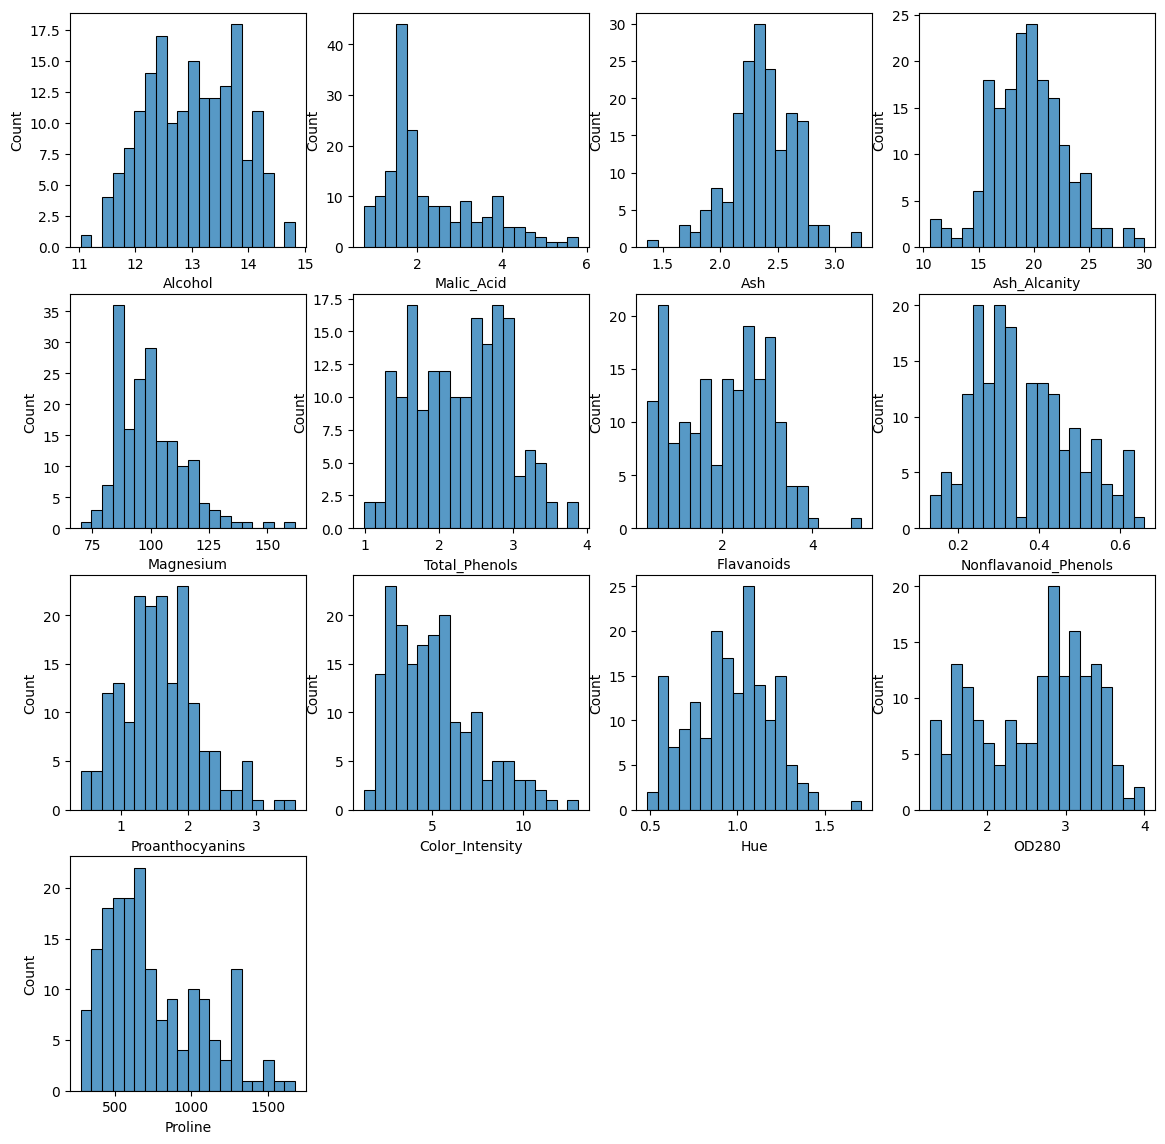

In [20]:
plt.figure(figsize=(14,14))

i = 0
for column in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.histplot(df_full[column], bins=20)

plt.show()

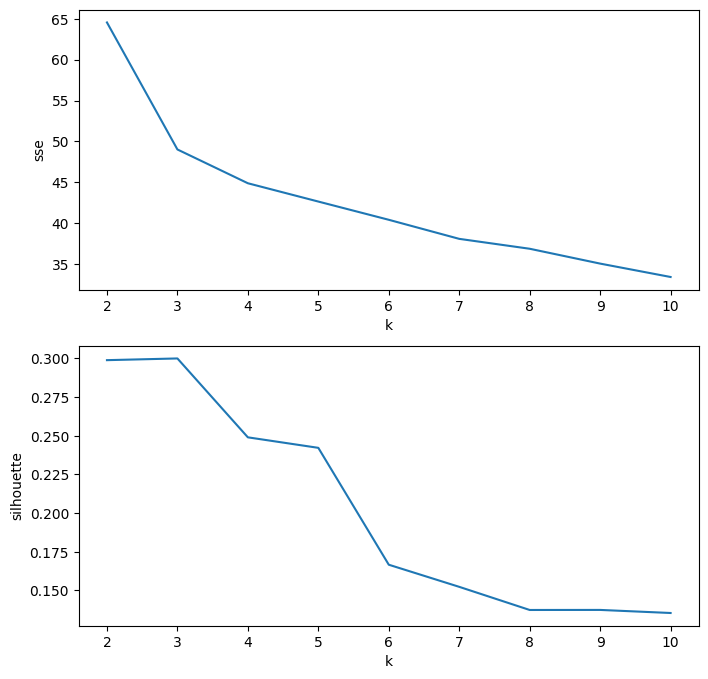

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13).fit(encoded)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': silhouette_score(encoded, kmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

plt.subplot(2, 1, 2)
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=13).fit(encoded)

kmeansEncoded = encoded.copy() # Uděláme si kopii, protože nechceme mít v encoded datech Labely pro druhý type clusteringu

kmeansEncoded["Labels"] = kmeans.labels_
kmeansEncoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


<Axes: xlabel='Labels', ylabel='count'>

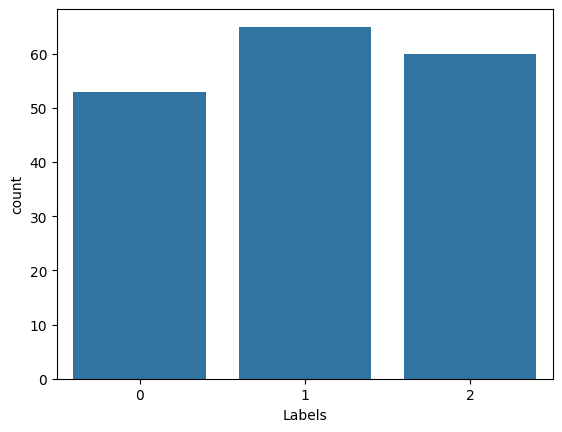

In [24]:
sns.countplot(data=kmeansEncoded, x='Labels')

<Axes: ylabel='Labels'>

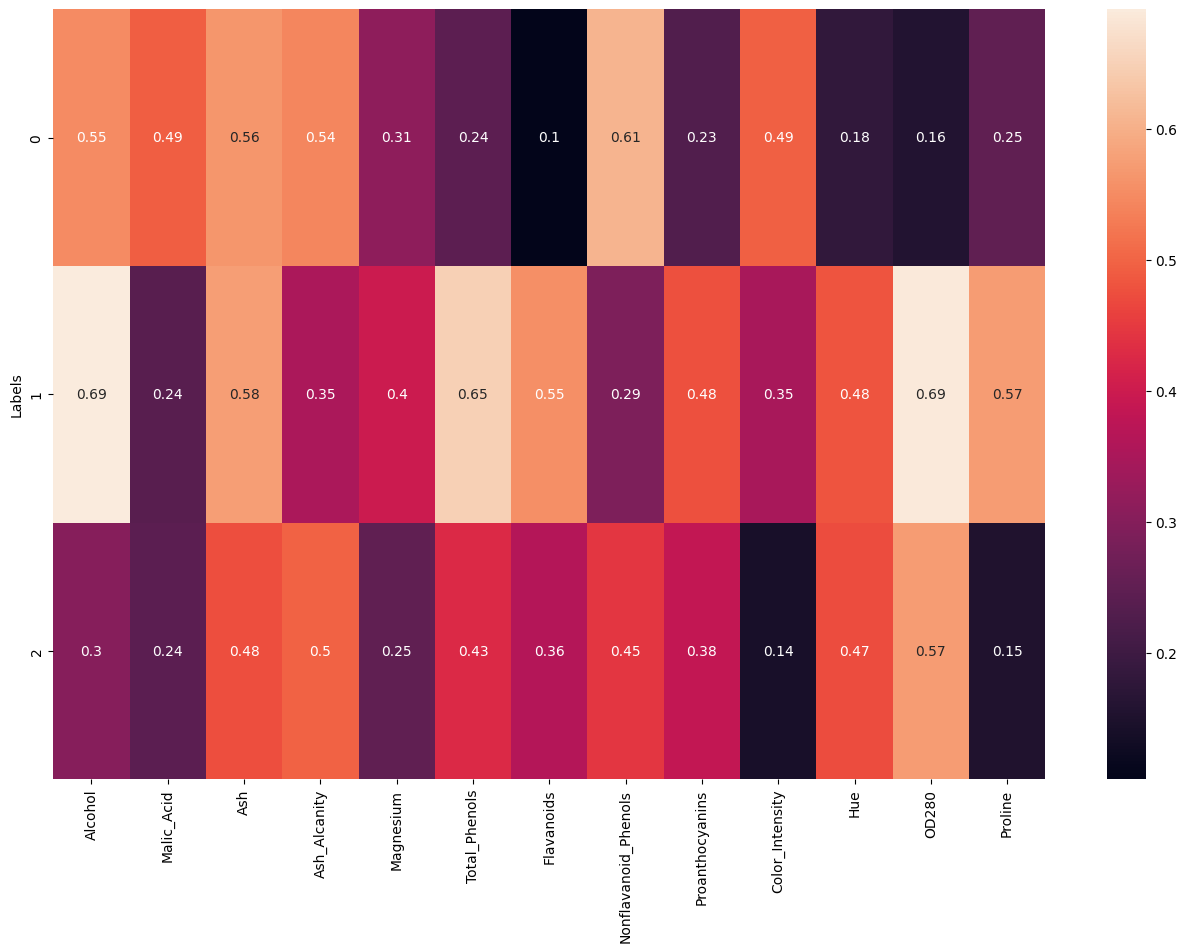

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(kmeansEncoded.groupby("Labels").mean(), annot=True)

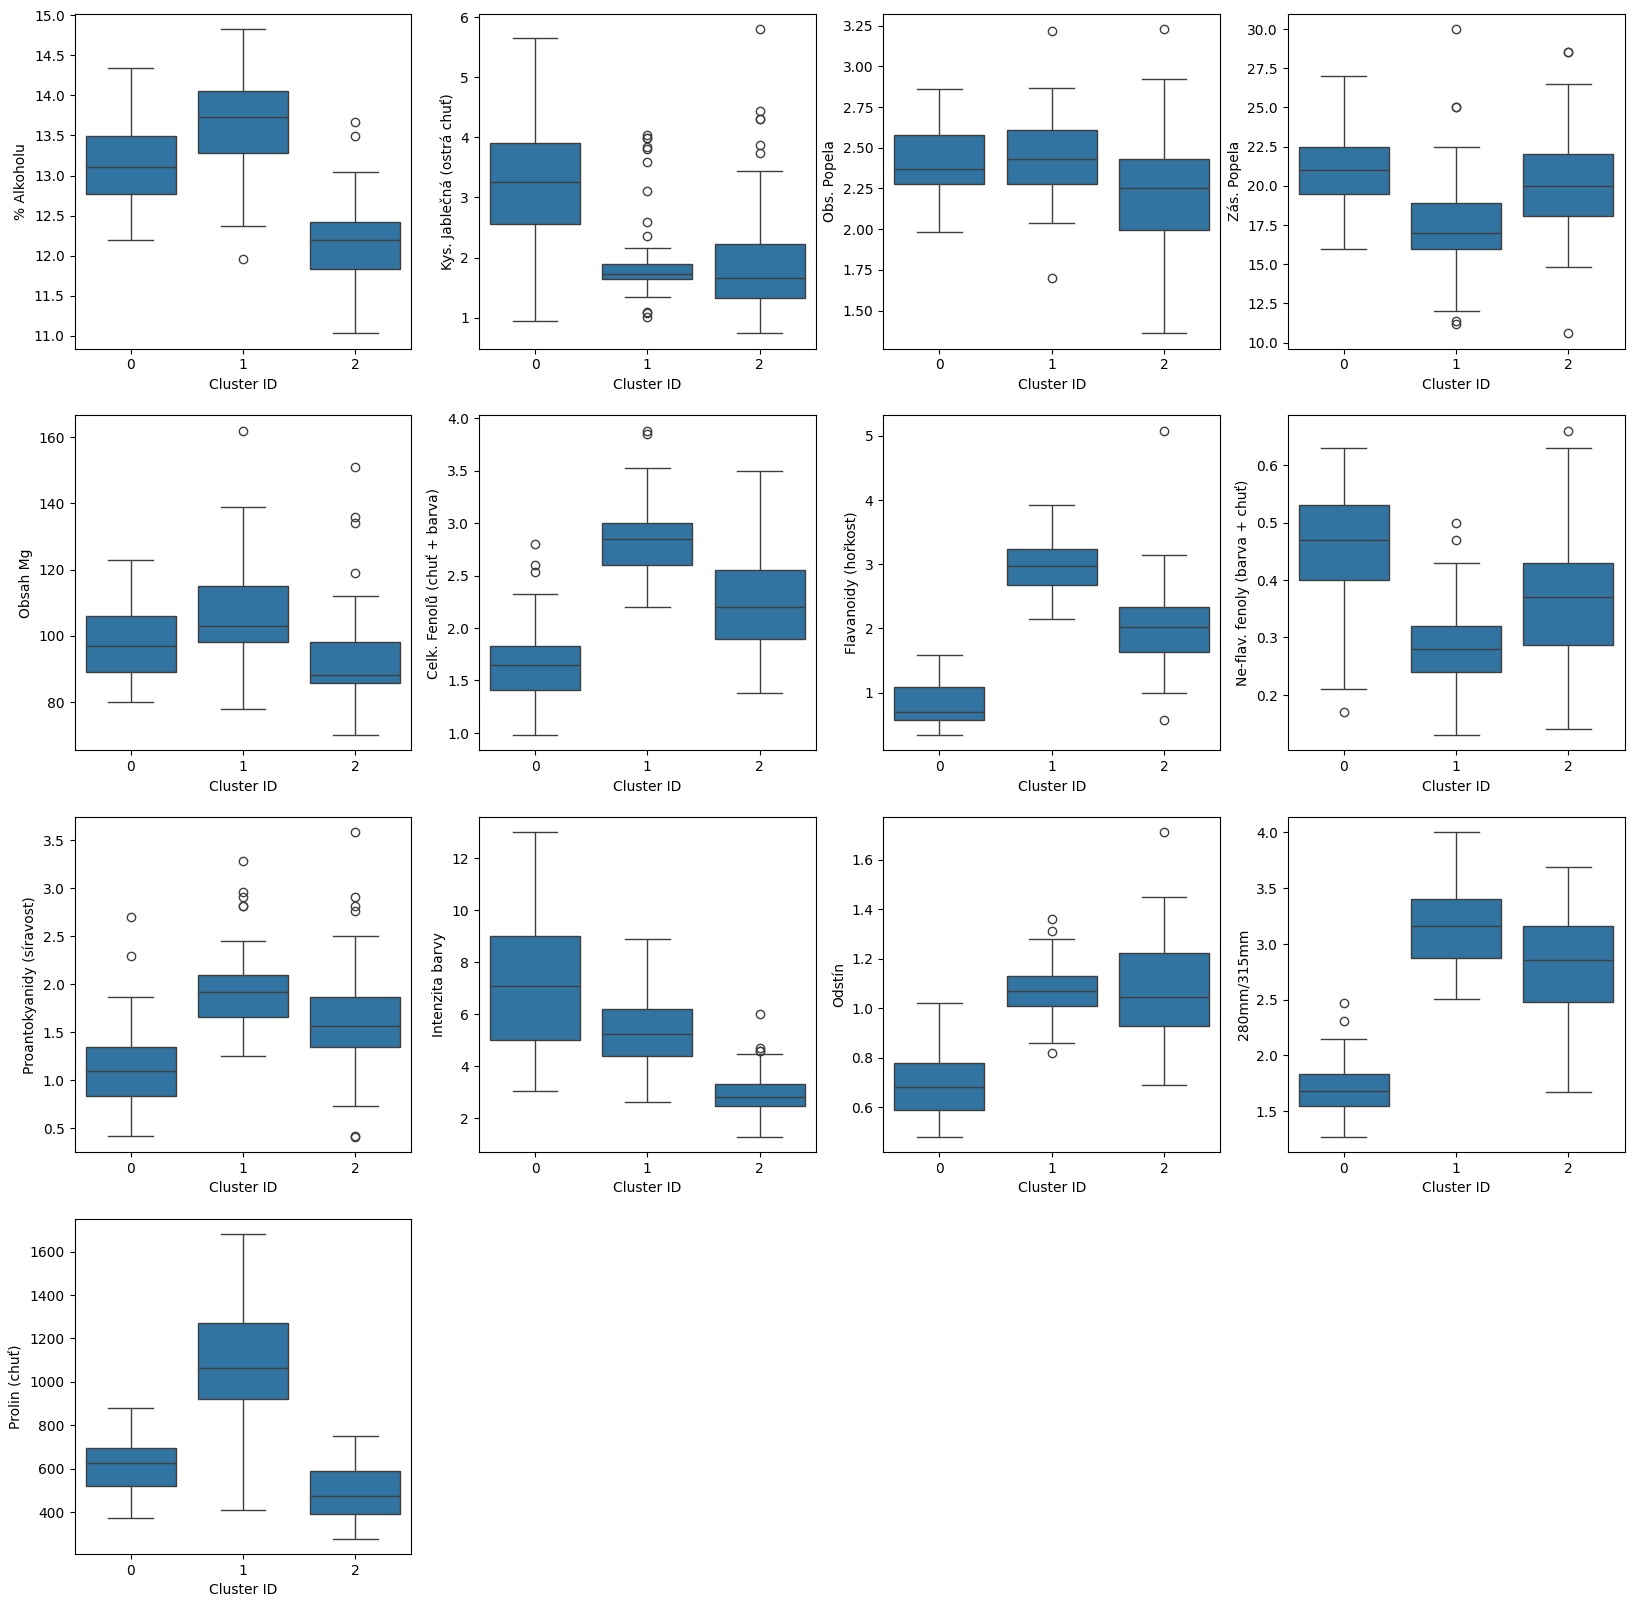

In [26]:
# napasování labelů na původní data
df_labelsKMeans = df_full.copy()
df_labelsKMeans["Labels"] = kmeansEncoded["Labels"]

col_desc = ["% Alkoholu", "Kys. Jablečná (ostrá chuť)", "Obs. Popela", "Zás. Popela", "Obsah Mg", "Celk. Fenolů (chuť + barva)", "Flavanoidy (hořkost)", "Ne-flav. fenoly (barva + chuť)", "Proantokyanidy (síravost)", "Intenzita barvy", "Odstín", "280mm/315mm", "Prolin (chuť)"]

plt.figure(figsize=(20,20))



i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_labelsKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[i - 1])
plt.show()